<a href="https://colab.research.google.com/github/BrazilianKing/Stroke-/blob/main/Strokes_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
# MatPlotLib
import matplotlib.pyplot as plt
# Preprocessing
from sklearn.compose import make_column_selector, make_column_transformer

In [3]:
df = pd.read_csv('/content/drive/MyDrive/excel downloads/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
#drop column 'id' because it is not needed 

df = df.drop(columns = 'id')

The ID # of the client has no effect on if they get a stroke or not.

In [6]:
# Display the number of rows and columns for the dataframe

df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 5110 rows, and 11 columns.
The rows represent 5110 observations, and the columns represent 10 features and 1 target variable.


Checking for duplicates

In [7]:
df.duplicated().sum()

0

In [8]:
 # Displaying column names and datatypes

df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Need to convert 'age' from a float to an int

Checking object categories to see which ones to ordinal encode

In [9]:
# Inspect categorical columns for errors

cat_cols = make_column_selector(dtype_include='object')(df)
for col in cat_cols:
  display(df[col].value_counts(normalize=True))

Female    0.585910
Male      0.413894
Other     0.000196
Name: gender, dtype: float64

Yes    0.656164
No     0.343836
Name: ever_married, dtype: float64

Private          0.572407
Self-employed    0.160274
children         0.134442
Govt_job         0.128571
Never_worked     0.004305
Name: work_type, dtype: float64

Urban    0.508023
Rural    0.491977
Name: Residence_type, dtype: float64

never smoked       0.370254
Unknown            0.302153
formerly smoked    0.173190
smokes             0.154403
Name: smoking_status, dtype: float64

# Ordinal Encoding

'gender', 'ever_married', and 'Residence_type'

In [10]:
# Replace boolean values with 0s and 1s

df['gender'].replace({'Female':1, 'Male':0, 'Other':0}, inplace=True)
# replace other with 'Male' using ordinal encoding 

df['ever_married'].replace({'No':0, 'Yes':1}, inplace=True)

df['Residence_type'].replace({'Urban':0, 'Rural':1}, inplace=True)


# Rename 'Gender' to 'isfemale' for clarity
df.rename(columns={'gender':'isfemale'}, inplace=True)

df[['isfemale', 'ever_married', 'Residence_type']].value_counts()

isfemale  ever_married  Residence_type
1         1             0                 1028
                        1                  973
0         1             0                  683
                        1                  669
1         0             0                  501
                        1                  492
0         0             0                  384
                        1                  380
dtype: int64

ever_married and Residence_type only have 2 values so we gave it a binary value.

gender has 3 values but 'other' only appears one time in this data set

In [11]:
# Inspect numerical columns for errors

num_cols = make_column_selector(dtype_include='number')(df)
for col in num_cols:
  display(df[col].value_counts(normalize=True))

1    0.58591
0    0.41409
Name: isfemale, dtype: float64

78.00    0.019961
57.00    0.018591
52.00    0.017613
54.00    0.017025
51.00    0.016830
           ...   
1.40     0.000587
0.48     0.000587
0.16     0.000587
0.40     0.000391
0.08     0.000391
Name: age, Length: 104, dtype: float64

0    0.902544
1    0.097456
Name: hypertension, dtype: float64

0    0.945988
1    0.054012
Name: heart_disease, dtype: float64

1    0.656164
0    0.343836
Name: ever_married, dtype: float64

0    0.508023
1    0.491977
Name: Residence_type, dtype: float64

93.88     0.001174
91.68     0.000978
91.85     0.000978
83.16     0.000978
73.00     0.000978
            ...   
111.93    0.000196
94.40     0.000196
95.57     0.000196
66.29     0.000196
85.28     0.000196
Name: avg_glucose_level, Length: 3979, dtype: float64

28.7    0.008352
28.4    0.007741
26.7    0.007537
27.6    0.007537
26.1    0.007537
          ...   
48.7    0.000204
49.2    0.000204
51.0    0.000204
49.4    0.000204
14.9    0.000204
Name: bmi, Length: 418, dtype: float64

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [12]:
# converting 'age' from float to int

df['age'] = df['age'].apply(np.int64)

# Checking for missing data

In [13]:
## Display the total number of missing values

print(f'There are {df.isna().sum().sum()} missing values.')

There are 201 missing values.


In [14]:
# Confirming where the missing data is coming from

df.isna().sum()

isfemale               0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We will handle the missing data in 'bmi' later when we are splitting the data

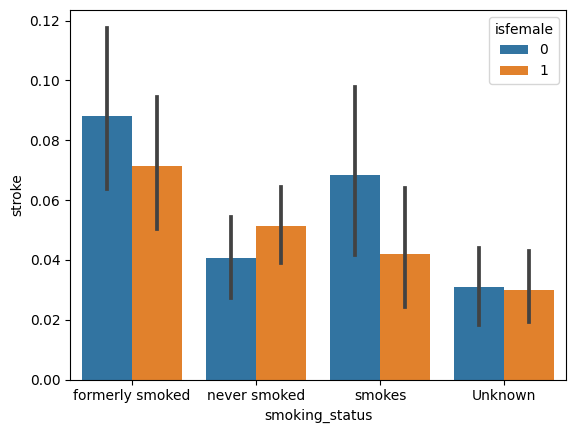

In [15]:
import seaborn as sns

sns.barplot(data = df, x = 'smoking_status', y = 'stroke', hue='isfemale');

This graph shows that those who formerly smoked are more than likely to have a stroke. Even a higher chance than those who are currently smoking

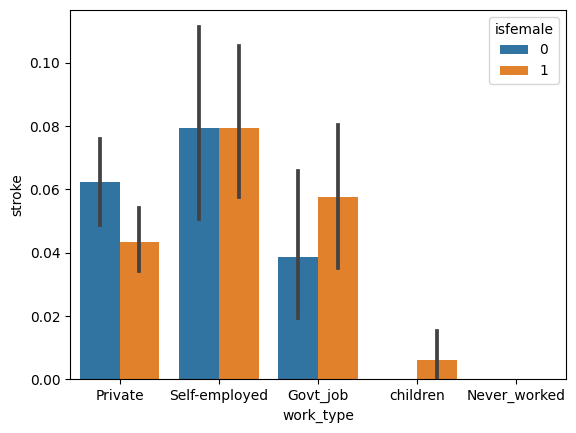

In [16]:
sns.barplot(data = df, x = 'work_type', y = 'stroke', hue='isfemale');

Both male and female who are self employed are more than likely to get a stroke meanwhile those who never worked have close to no chance of having a stroke

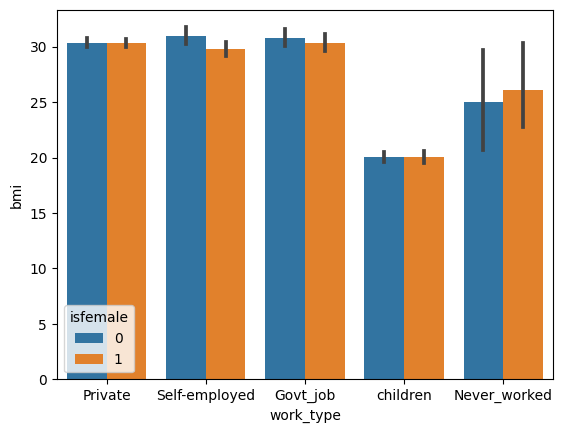

In [17]:
sns.barplot(data = df, x = 'work_type', y = 'bmi', hue='isfemale');

So it seems as if those who are in the work force have a much higher BMI than those who are not. Even those who are self employed who seem to have the highest BMI of them all.

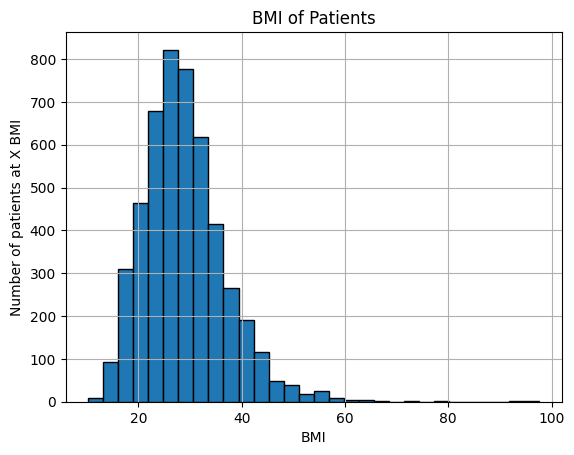

In [18]:
ax = df['bmi'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x')
ax.set_title('BMI of Patients')
ax.set_xlabel('BMI')
ax.set_ylabel('Number of patients at X BMI');

the majority of the clients BMIs are under 30

it is clear as well that smoking does not help with weight loss nor does it increase weight gain because our BMIs are all over the place.

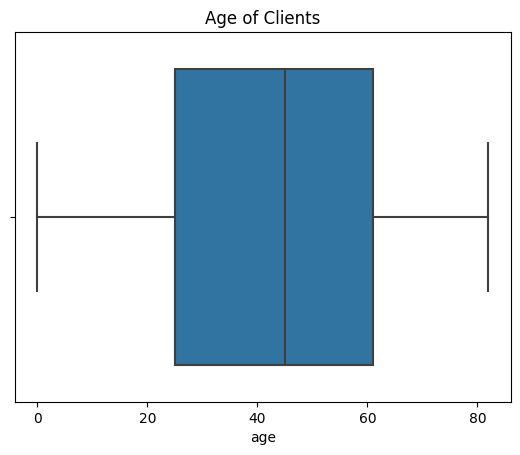

In [19]:
# Horizontal boxplot with Seaborn

ax = sns.boxplot(x='age', data=df)
ax.set_title("Age of Clients");

The average age is inbetween 22 and 61 while the median age is 43

while the lowest age is 1 and the highest age is 83

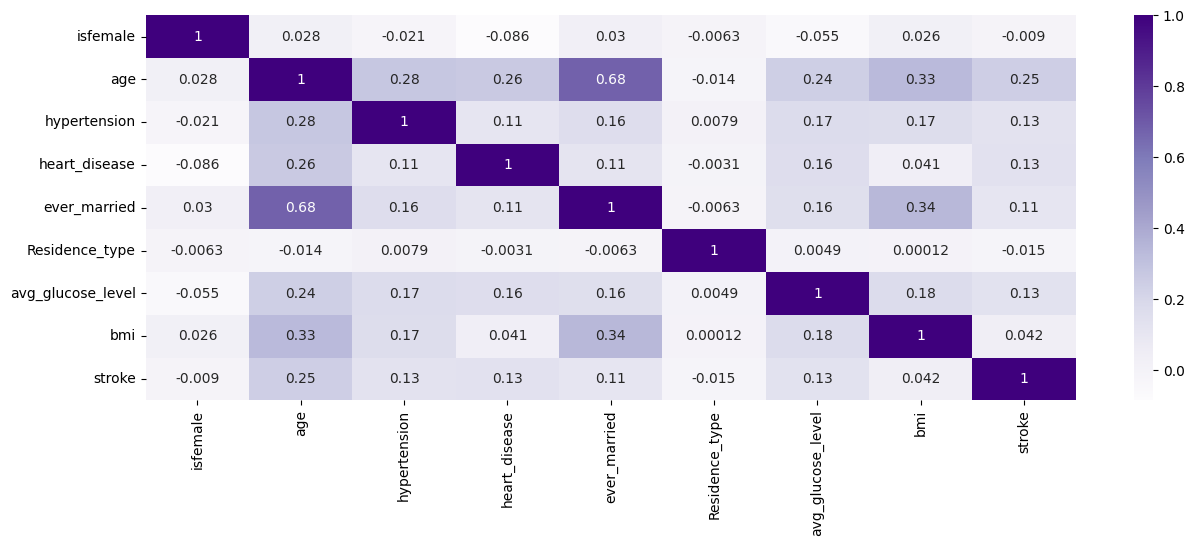

In [24]:
fig, ax = plt.subplots(figsize=(15,5))

sns.heatmap(df.corr(), cmap = 'Purples', annot = True);

Based on this heatmap I do not have many coorolations other than 'ever_married' & 'age' which is at .68


 isfemale 



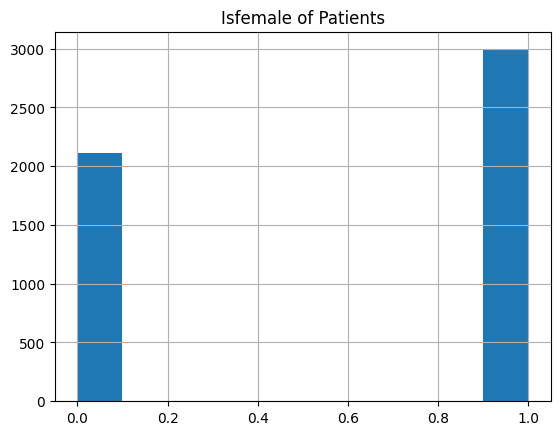


 age 



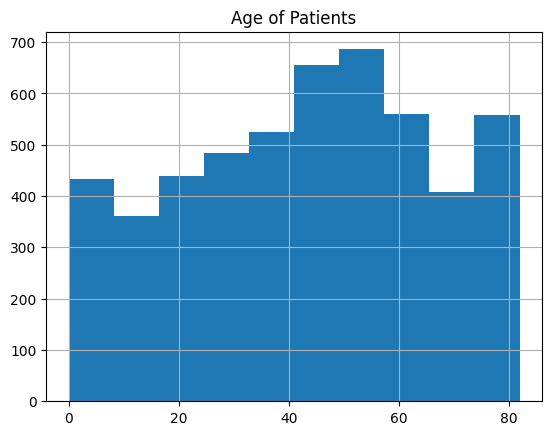


 hypertension 



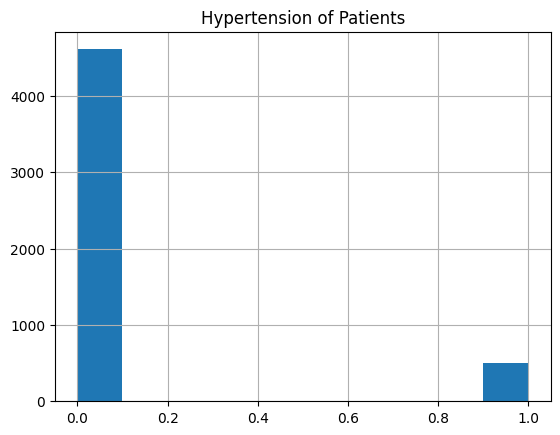


 heart_disease 



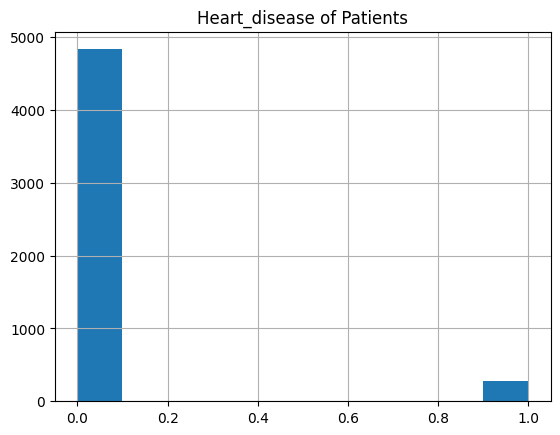


 ever_married 



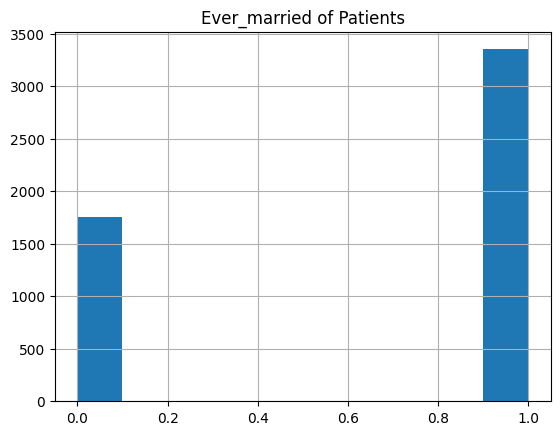


 Residence_type 



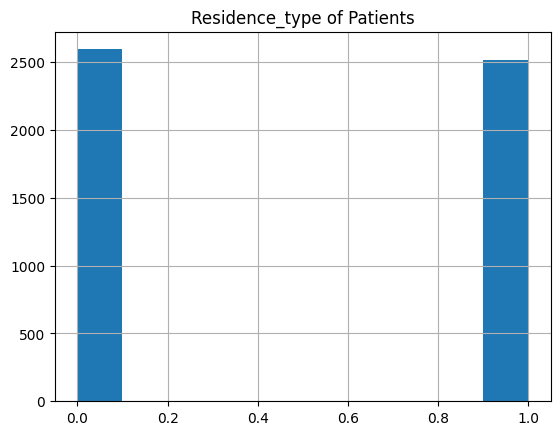


 avg_glucose_level 



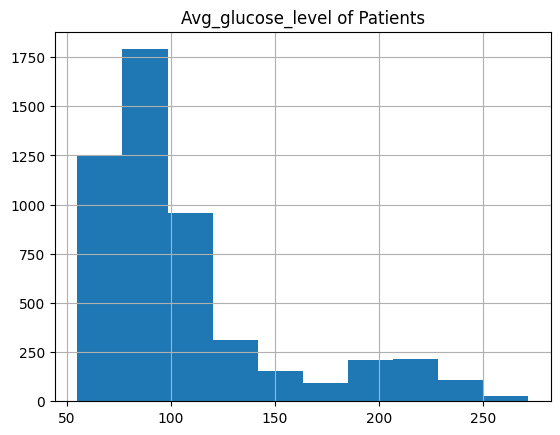


 bmi 



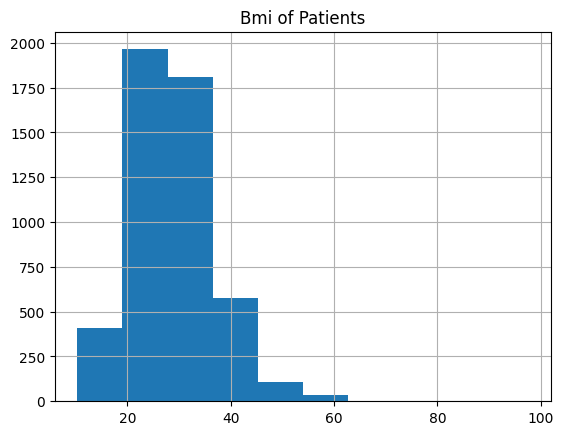


 stroke 



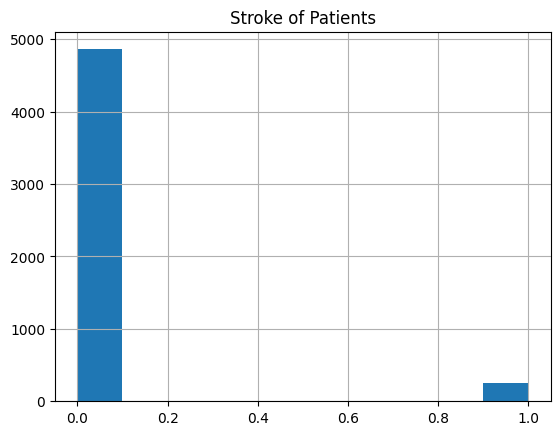

In [22]:
# Explore numeric distributions
for col in df.select_dtypes('number'):
  plt.title(col.capitalize() + ' of Patients')
  print('\n', col, '\n')
  df[col].hist()
  plt.show()

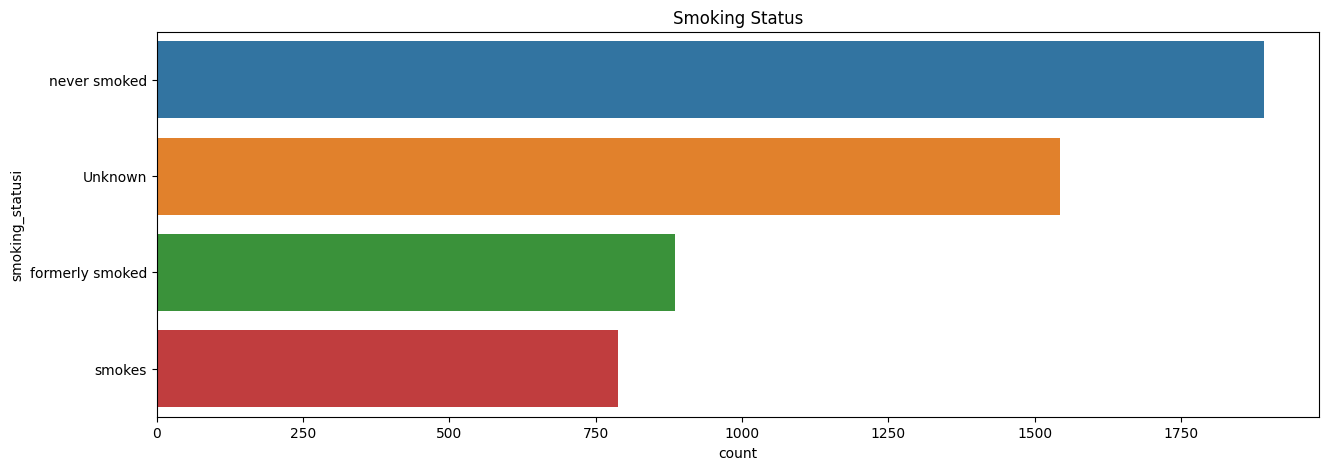

In [29]:
fig, ax = plt.subplots(figsize=(15,5))

sns.countplot(data = df, y = 'smoking_status', order = df['smoking_status'].value_counts().index)

ax.set(title = 'Smoking Status')
ax.set(ylabel = 'smoking_status');

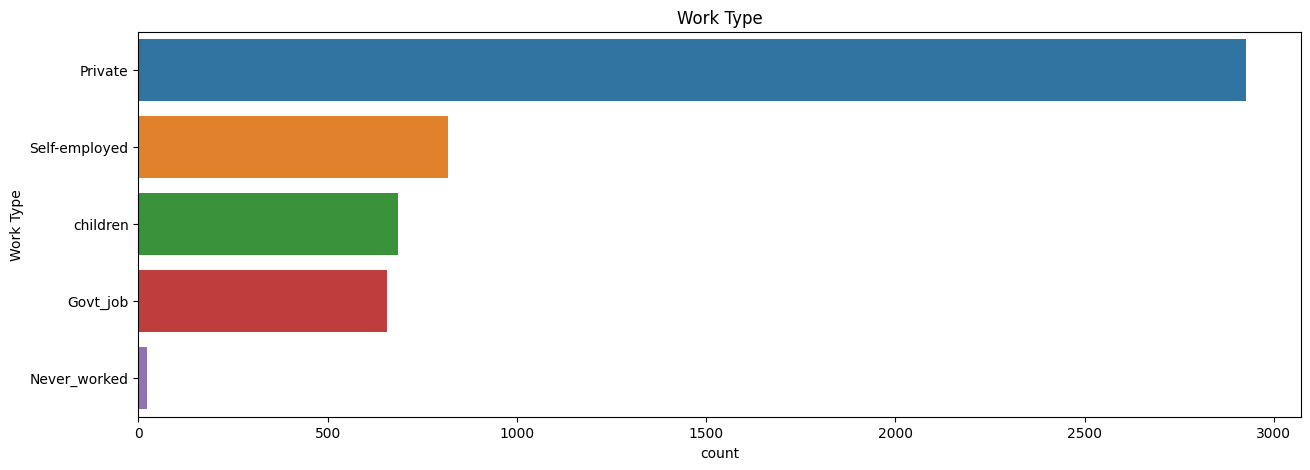

In [33]:
fig, ax = plt.subplots(figsize=(15,5))

sns.countplot(data = df, y = 'work_type', order = df['work_type'].value_counts().index)

ax.set(title = 'Work Type')
ax.set(ylabel = 'Work Type');

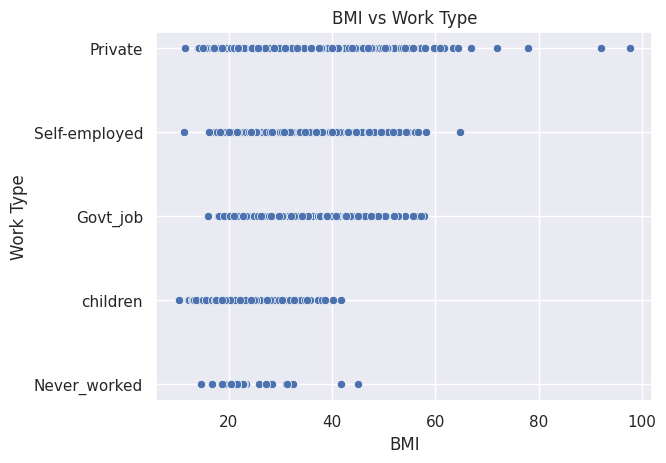

In [46]:
sns.set(font_scale=1)
sns.scatterplot(x='bmi', y='work_type', 
    data=df).set(title='BMI vs Work Type')
plt.xlabel(
    'BMI')
plt.ylabel('Work Type');

Accoring to this chart, those who have a private work type tend to tred on having a higher BMI where as the childern and those who have never worked are much lower on average

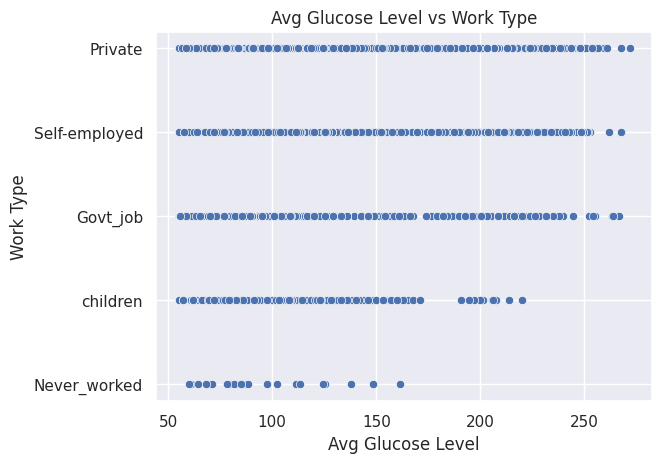

In [44]:
sns.set(font_scale=1)
sns.scatterplot(x='avg_glucose_level', y='work_type', 
    data=df).set(title='Avg Glucose Level vs Work Type')
plt.xlabel(
    'Avg Glucose Level')
plt.ylabel('Work Type');

Based off of this chart unless you are a child or never worked your glugose level are off the charts unless the majority of people just finsihed eating before being tested.

Based off of the two scatter plots we can see that those with a private work type have a high BMI and average glucose level.

Those who are children and never worked have a lower BMI and lower average glucose level.

I am very suprised to see that children on average have a higher BMI and glucose level than those who never work because the odds are that children also never worked before.